Задание **Ultra pro**

Найдите любую базу, подходящую для регрессии:

1. Сделайте парсинг и обработку данных.
2. Разделите данные на обучающую и проверочную выборки
3. Напишите сеть для регрессии
4. Сделайте визуализацию результата
5. Напишите ваши результаты и выводы

В данной домашней работе будут представлены три задачи:

1. **Monthly Rainfall Data of India of a century** - Ежемесячные данные о количестве осадков в Индии за столетие.

2. **Fathers and Son height Data from Pearson's Data** - Данные о росте отца и сына из данных Пирсона

3. **Bollywood Movies Revenue(2015-2019)** - Доход от фильмов Болливуда (2015-2019)

# **Импорт библиотек и подключение Google диска. Дополнительные функции.**

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import LambdaCallback
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from IPython.display import clear_output
from tensorflow.keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from google.colab import drive
from tensorflow.keras.utils import plot_model
import numpy as np
import pandas as pd
import random
import math
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Подключаем гугл диск
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Функция вывода summary и схемы нейронной сети
def showModel(model):
  model.summary()
  print ("\n\n")
  return plot_model(model, dpi=55, show_shapes=True)

In [ ]:
# Функция вывода графиков
def chart(hist):
  plt.plot(history.history['mae'], label='Средняя абсолютная ошибка на обучающем наборе')
  plt.plot(history.history['val_mae'], label='Средняя абсолютная ошибка на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Средняя абсолютная ошибка')
  plt.legend()
  plt.show()

In [ ]:
def correlate(a,b):
  ma = a.mean()
  mb = b.mean()
  mab = (a*b).mean()
  sa = a.std()
  sb = b.std()

  val = 1
  if ((sa>0) & (sb>0)):
    val = (mab-ma*mb) / (sa*sb)
  return val

# **Monthly Rainfall Data of India of a century**
Compiled rainfall data for 1901-2002 for the whole of India by Vikas Bardia

**Ежемесячные данные о количестве осадков в Индии за столетие.**

Составленные Викасом Бардией данные об осадках за 1901-2002 гг. Для всей Индии.

Данный датасет взят с сайта kaggle.com

https://www.kaggle.com/ravisane1/monthly-rainfall-data-india-of-a-century?select=india_monthly_rainfall_data.csv

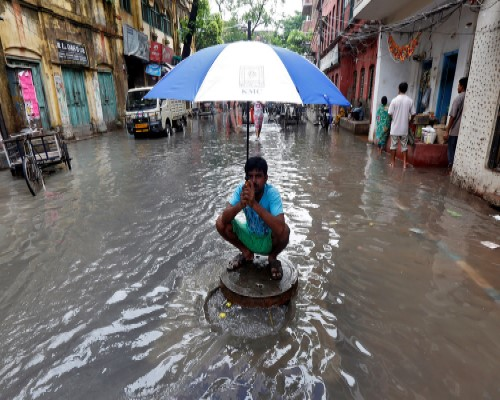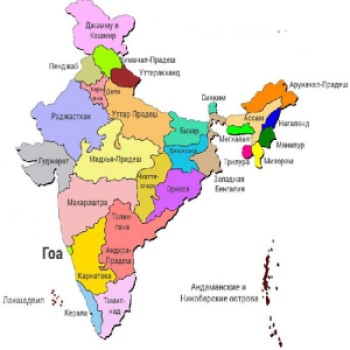

В этом наборе данных нам дано ежемесячное количество осадков в городах штатов Индии. Набор данных состоит из записей почти за столетие с 1901 по 2002 год. Это может помочь пользователю предсказать изменения в погодных условиях, влияние глобального потепления, изменения климата и то, что мы можем ожидать от нашей матери-Земли. Приведенные ниже данные об осадках за 1901-2002 гг. Для всей Индии предоставлены Викасом Бардиа, студентом Оксфордского университета, Великобритания.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Регрессия база/Monthly Rainfall Data of India of a century/india_monthly_rainfall_data.csv')

## Рассмотрение таблицы

In [ ]:
# Рассмотрим предоставленный датасет и сделааем выводы
data


,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Andhra Pradesh,Adilabad,1901.0,6.725,10.488,23.288,35.560,23.119,115.546,294.119,276.865,181.615,47.310,1.339,0.000
1,Andhra Pradesh,Adilabad,1902.0,0.420,0.000,0.388,6.070,3.331,45.960,233.973,167.971,198.177,26.447,35.083,11.222
2,Andhra Pradesh,Adilabad,1903.0,6.643,1.956,0.173,4.551,33.348,132.078,436.611,334.544,226.037,138.818,14.095,8.823
3,Andhra Pradesh,Adilabad,1904.0,0.054,0.121,11.446,0.017,16.900,131.048,160.694,81.865,251.577,110.391,0.146,0.130
4,Andhra Pradesh,Adilabad,1905.0,0.589,2.293,8.252,35.020,17.569,79.937,96.331,313.522,361.697,4.950,0.146,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55312,West Bengal,North Dinajpur,2000.0,11.294,10.908,10.686,27.669,110.618,264.845,185.798,297.535,280.883,22.048,0.568,0.423
55313,West Bengal,North Dinajpur,2001.0,1.866,4.048,21.805,36.436,152.242,164.361,311.196,271.373,165.015,124.258,2.798,0.000
55314,West Bengal,North Dinajpur,2002.0,14.939,3.758,12.410,54.591,80.993,189.604,276.109,285.924,215.591,108.733,17.757,0.000
55315,Lakshadweep,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55317 entries, 0 to 55316
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     55317 non-null  object 
 1   District  55317 non-null  object 
 2   Year      55284 non-null  float64
 3   Jan       55284 non-null  float64
 4   Feb       55284 non-null  float64
 5   Mar       55284 non-null  float64
 6   Apr       55284 non-null  float64
 7   May       55284 non-null  float64
 8   Jun       55284 non-null  float64
 9   Jul       55284 non-null  float64
 10  Aug       55284 non-null  float64
 11  Sep       55284 non-null  float64
 12  Oct       55284 non-null  float64
 13  Nov       55284 non-null  float64
 14  Dec       55284 non-null  float64
dtypes: float64(13), object(2)
memory usage: 6.3+ MB


Выводы по таблице:
 - Таблица состоит из:
   - 55317 строк
   - 15 столбцов
 - Столбцы:
    - State (**Штат**)
    - District (**Округ**)
    - Year (**Год**)
    - Jan-Dec (**12 месяцев с января по декабрь**)
  
  - Так же присутствуют строки с пустыми значениями

  
  

Рассмотрим детально некоторые столбцы:

In [ ]:
# Столбец State (Штат)
print(data['State'].unique())   # Уникальные значения
print('\nКоличество уникальных значений:', data['State'].nunique())
print('\nКоличество значений каждого штата: \n\n',data['State'].value_counts())


['Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar' 'Chandigarh'
 'Chattisgarh' 'Dadra & Nagar Haveli' 'Daman & Diu' 'Delhi' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram'
 'Nagaland' 'Orissa' 'Pondicherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Tripura' 'Uttar Pradesh' 'Uttaranchal' 'West Bengal'
 'Lakshadweep' 'Goa']

Количество уникальных значений: 34

Количество значений каждого штата: 

 Uttar Pradesh           7140
Madhya Pradesh          4590
Bihar                   3774
Rajasthan               3264
Orissa                  3060
Maharashtra             2964
Tamil Nadu              2959
Karnataka               2451
Andhra Pradesh          2346
Assam                   2142
Gujarat                 2045
Haryana                 1938
Jharkhand               1836
West Bengal             1836
Punjab                  1734
Chattisgarh             1632
Jammu & Kashmir         

In [ ]:
# Столбец District (Округ)
print(data['District'].unique())   # Уникальные значения
print('\nКоличество уникальных значений:', data['District'].nunique())
print('\nКоличество значений каждого округа: \n\n',data['District'].value_counts())

['Adilabad' 'Anantapur' 'Chittoor' 'Cuddapah' 'East Godavari' 'Guntur'
 'Hyderabad' 'Karimnagar' 'Khammam' 'Krishna' 'Kurnool' 'Mahbubnagar'
 'Medak' 'Nalgonda' 'Nellore' 'Nizamabad' 'Prakasam' 'Rangareddi'
 'Srikakulam' 'Vishakhapatnam' 'Vizianagaram' 'Warangal' 'West Godavari'
 'Changlang' 'Dibang Valley' 'East Kameng' 'East Siang' 'Lohit'
 'Lower Subansiri' 'Tawang' 'Tirap' 'Upper Subansiri' 'West Kameng'
 'West Siang' 'Barpeta' 'Cachar' 'Darrang' 'Dhemaji' 'Dhubri' 'Dibrugarh'
 'Golaghat' 'Golapara' 'Hailakandi' 'Jorhat' 'Kamrup' 'Karbi Anglong'
 'Karimganj' 'Kokrajhar' 'Lakhimpur' 'Nagaon' 'Nalbari'
 'North Cachar Hills' 'Sibsagar' 'Sonitpur' 'Tinsukia' 'Araria'
 'Aurangabad' 'Banka' 'Begusarai' 'Bhagalpur' 'Bhojpur' 'Buxar'
 'Darbhanga' 'Gaya' 'Gopalganj' 'Jamui' 'Jehanabad' 'Kaimur' 'Katihar'
 'Khagaria' 'Kishanganj' 'Lakhisarai' 'Madhepura' 'Madhubani' 'Munger'
 'Muzaffarpur' 'Nalanda' 'Nawada' 'Paschim Champaran' 'Patna'
 'Purba Champaran' 'Purnia' 'Rohtas' 'Saharsa' 'Samastip

In [ ]:
# Столбец Year (Год)
print(data['Year'].unique())   # Уникальные значения
print('\nКоличество уникальных значений:', data['Year'].nunique())
print('\nКоличество значений каждого года: \n\n',data['Year'].value_counts())

[1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911. 1912.
 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923. 1924.
 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935. 1936.
 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1946. 1947. 1948.
 1949. 1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960.
 1961. 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972.
 1973. 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984.
 1985. 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996.
 1997. 1998. 1999. 2000. 2001. 2002.   nan]

Количество уникальных значений: 102

Количество значений каждого года: 

 1919.0    542
1957.0    542
1947.0    542
1948.0    542
1949.0    542
         ... 
1990.0    542
1991.0    542
1992.0    542
1993.0    542
1920.0    542
Name: Year, Length: 102, dtype: int64


In [ ]:
# Подсчитаем кол-во пустых ячеек
data.isna().sum()

State        0
District     0
Year        33
Jan         33
Feb         33
Mar         33
Apr         33
May         33
Jun         33
Jul         33
Aug         33
Sep         33
Oct         33
Nov         33
Dec         33
dtype: int64

Выводы по рассмотренным столбцам:
 - Колонка **State(Штат)** представлена 34 значениями и имеет большую разность в значениях от 1 до 7140.
 - Колонка **District(Округ)** представлена 572 значениями и имеет разность в значениях от 1 до 204.
 - Колонка **Year(Год)** представлена 102 значениями в каждой по 542 записи. Тип int64.
 - 33 строки со значением - NaN

## Работа с таблицей

In [ ]:
# Для начала удалим строки со значением NaN
data = data.dropna()

In [ ]:
data.shape   # 55317 - 33 = 55284 строки

(55284, 15)

Создадим необходимые функции:

In [ ]:
# Создание словаря 
def create_dict(s):
  ret = {}
  for _id, name in enumerate(s):
    ret.update({name: _id})
  return ret

# Создадим функцию, которая будет преобразововать значения в one hot encoding
def to_ohe(value,d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr


In [ ]:
# Из всех текстовых колонок создаем словарь. Это нужно потому что нейронная сеть не работает с буквами(символами). Только с цифрами
state_dict = create_dict(set(data['State']))
district_dict = create_dict(set(data['District']))
year_dict = create_dict(set(data['Year']))

In [ ]:
# В переменные запишем нормированный результат всех числовых колонок
# Jan = preprocessing.scale(data['Jan'])
# Feb = preprocessing.scale(data['Feb'])
# Mar = preprocessing.scale(data['Mar'])
# Apr = preprocessing.scale(data['Apr'])
# May = preprocessing.scale(data['May'])
# Jun = preprocessing.scale(data['Jun'])
# Jul = preprocessing.scale(data['Jul'])
# Aug = preprocessing.scale(data['Aug'])
# Sep = preprocessing.scale(data['Sep'])
# Oct = preprocessing.scale(data['Oct'])
# Nov = preprocessing.scale(data['Nov'])
# Dec = preprocessing.scale(data['Dec'])

In [ ]:
Jan = np.array(data['Jan'])
Feb = np.array(data['Feb'])
Mar = np.array(data['Mar'])
Apr = np.array(data['Apr'])
May = np.array(data['May'])
Jun = np.array(data['Jun'])
Jul = np.array(data['Jul'])
Aug = np.array(data['Aug'])
Sep = np.array(data['Sep'])
Oct = np.array(data['Oct'])
Nov = np.array(data['Nov'])
Dec = np.array(data['Dec'])

## Создание выборок для обучения и проверки

In [ ]:
# Для начала создадим пустую обучающую выборку
X =[]
Y = []

In [ ]:
# Создадим цикл для прохода по всей таблице
for _id, india in enumerate(np.array(data)):
          
  # Объеденяем все параметры в один большой вектор
  x_tr = to_ohe(india[0], state_dict) + to_ohe(india[1], district_dict) + to_ohe(india[2], year_dict)

  # Добавляем этот вектор в список x_train
  X.append(x_tr)

  # Аналогично для y_train
  y_tr = [Jan[_id],	Feb[_id],	Mar[_id],	Apr[_id],	May[_id],	Jun[_id],	Jul[_id],	Aug[_id],	Sep[_id],	Oct[_id],	Nov[_id],	Dec[_id],]
  Y.append(y_tr)    

### Черновик

In [ ]:
# # Создадим цикл для прохода по всей таблице
# for _id, india in enumerate(np.array(data)):
          
#   # Объеденяем все параметры в один большой вектор
#   x_tr = to_ohe(india[0], state_dict) + to_ohe(india[1], district_dict) + to_ohe(india[2], year_dict)

#   # Добавляем этот вектор в список x_train
#   X.append(x_tr)

#   # Аналогично для y_train
#   y_tr = [data['Jan'][_id],	data['Feb'][_id], data['Mar'][_id], data['Apr'][_id], data['May'][_id], data['Jun'][_id], 
#      data['Jul'][_id], data['Aug'][_id], data['Sep'][_id], data['Oct'][_id], data['Nov'][_id],data['Dec'][_id]]
#   Y.append(y_tr)    

In [ ]:
# Jan	Feb	Mar	Apr	May	Jun	Jul	Aug	Sep	Oct	Nov	Dec

In [ ]:
# x = [data['Jan'][0],	data['Feb'][0], data['Mar'][0], data['Apr'][0], data['May'][0], data['Jun'][0], 
#      data['Jul'][0], data['Aug'][0], data['Sep'][0], data['Oct'][0], data['Nov'][0],data['Dec'][0]]
# Y.append(x)

In [ ]:
# x = [data['Jan'][1],	data['Feb'][1], data['Mar'][1], data['Apr'][1], data['May'][1], data['Jun'][1], 
#      data['Jul'][1], data['Aug'][1], data['Sep'][1], data['Oct'][1], data['Nov'][1],data['Dec'][1]]
# Y.append(x)

In [ ]:
# x = [india[3][_id],	india[4][_id], india[5][_id], india[6][_id], india[7][_id], india[8][_id],
#         india[9][_id], india[10][_id], india[11][_id], india[12][_id], india[13][_id],india[14][_id]]
# Y.append(x)

In [ ]:
# data.head(2)

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Andhra Pradesh,Adilabad,1901.0,6.725,10.488,23.288,35.56,23.119,115.546,294.119,276.865,181.615,47.310,1.339,0.000
1,Andhra Pradesh,Adilabad,1902.0,0.420,0.000,0.388,6.07,3.331,45.960,233.973,167.971,198.177,26.447,35.083,11.222


## Нормализация данных

In [ ]:
# Посмотрим на первый элемент массива
print(Y[0])

[6.725, 10.488, 23.288, 35.56, 23.119, 115.546, 294.119, 276.865, 181.615, 47.31, 1.339, 0.0]


In [ ]:
# Из списка делаем numpy массив
X_arr = np.array(X, dtype=np.float)
Y_arr = np.array(Y, dtype=np.float)

In [ ]:
print(Y_arr[0])

[  6.725  10.488  23.288  35.56   23.119 115.546 294.119 276.865 181.615
  47.31    1.339   0.   ]


In [ ]:
# Для лучшей работы сети нормализуем значения коорые хранятся в y_train
y_scaler = StandardScaler()
Y_scal= y_scaler.fit_transform(Y_arr)

Y_scal[0]

array([-0.3626769 , -0.27507571,  0.05677936, -0.0498063 , -0.39195556,
       -0.34591256, -0.02381   ,  0.01060084, -0.00308078, -0.33365738,
       -0.46368229, -0.37766334])

In [ ]:
y_test_inverse = y_scaler.inverse_transform(Y_scal)
y_test_inverse[0]

array([  6.725,  10.488,  23.288,  35.56 ,  23.119, 115.546, 294.119,
       276.865, 181.615,  47.31 ,   1.339,   0.   ])

In [ ]:
# Полный набор данных. Который нужно разделить на выборки (обучающую, проверочную и тестовую)
print (X.shape)
print (Y.shape) 

(55284, 673)
(55284, 12)


In [ ]:
# Разделение на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X_arr, Y_scal, test_size=0.15, shuffle=True)   #Параметр shuffle можно указывать, а можно нет, все равно данные идут не по порядку какому-нибудь

In [ ]:
# Далее с помощью такого же метода разделим обучающую выборку на (обучающую и проверочную)
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)

In [ ]:
# Посмотрим размерность обучающей, проверочной и тестовой выборок после разделения.

print ("Обучающая выборка:")
print (x_train_new.shape)
print (y_train_new.shape) 

print ("\nПроверочная выборка:")
print (x_val.shape)
print (y_val.shape) 

print ("\nТестовая выборка:")
print (x_test.shape)
print (y_test.shape) 

Обучающая выборка:
(37592, 673)
(37592, 12)

Проверочная выборка:
(9399, 673)
(9399, 12)

Тестовая выборка:
(8293, 673)
(8293, 12)


## Нейронная сеть 

In [ ]:
model = Sequential()

# Добавляем слои  (4 Dense слоя и слои Dropout и BatchNormalization, которые можно раскомментировать для теста сети)
# C слоями Dropout сеть давала результаты хуже - обучать будем без этого слоя

model.add(Dense(500, input_dim=673, activation='relu'))     # 673 - входные данные
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(300, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(12, activation='linear'))

model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

### Вывод summary и схемы нейронной сети

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               337000    
_________________________________________________________________
batch_normalization (BatchNo (None, 500)               2000      
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               3

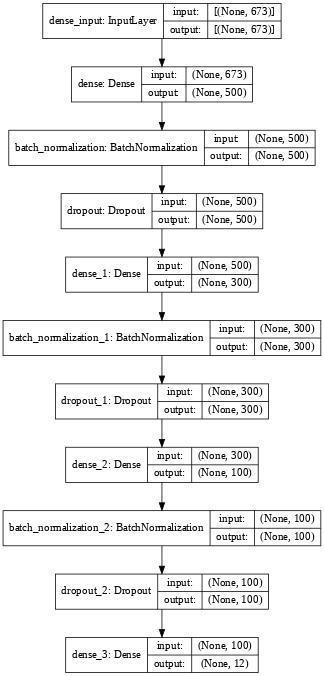

In [ ]:
showModel(model)

### Обучение (lr=1e-5) и график

In [ ]:
history = model.fit(x_train, y_train, batch_size=1000, epochs=50, verbose=1, validation_data=(x_val, y_val))

Epoch 1/50
47/47 [==============================] - 5s 86ms/step - loss: 3.1391 - mae: 1.3644 - val_loss: 1.0559 - val_mae: 0.6621
Epoch 2/50
47/47 [==============================] - 4s 83ms/step - loss: 2.9754 - mae: 1.3274 - val_loss: 1.1323 - val_mae: 0.7162
Epoch 3/50
47/47 [==============================] - 4s 83ms/step - loss: 2.8512 - mae: 1.2989 - val_loss: 1.2199 - val_mae: 0.7684
Epoch 4/50
47/47 [==============================] - 4s 83ms/step - loss: 2.7346 - mae: 1.2726 - val_loss: 1.2950 - val_mae: 0.8101
Epoch 5/50
47/47 [==============================] - 4s 83ms/step - loss: 2.6279 - mae: 1.2458 - val_loss: 1.3421 - val_mae: 0.8352
Epoch 6/50
47/47 [==============================] - 4s 84ms/step - loss: 2.5269 - mae: 1.2216 - val_loss: 1.3588 - val_mae: 0.8439
Epoch 7/50
47/47 [==============================] - 4s 84ms/step - loss: 2.4525 - mae: 1.2032 - val_loss: 1.3479 - val_mae: 0.8389
Epoch 8/50
47/47 [==============================] - 4s 84ms/step - loss: 2.3858 - m

## Оценка качества работы созданной сети

**Средняя ошибка на тестовой выборке:**

In [ ]:
# Получаем предсказание на тестовой выборке
prediction = model_ula.predict(x_test)
prediction[0]

array([ 3.1282902 ,  2.474589  ,  1.7938423 ,  0.04364989, -0.66413033,
       -0.19708724, -0.581589  , -0.4135242 , -0.38513833, -1.3291111 ,
       -0.7684143 ,  1.6195494 ], dtype=float32)

In [ ]:
# Перевод предсказанной моделью значений к первоначальному диапазону
predict_inverse = y_scaler.inverse_transform(prediction)
predict_inverse[0]

array([ 70.6579  ,  71.60357 ,  83.13799 ,  42.060844, -12.315778,
       145.61418 , 180.37593 , 206.64496 , 133.22095 , -45.597424,
       -16.404581,  61.68838 ], dtype=float32)

In [ ]:
# Переводем значения y_test к первоначальному диапазону (были нормированы)
y_test_inverse = y_scaler.inverse_transform(y_test)
y_test_inverse[0]

array([ 88.085,  56.396, 218.456, 127.032, 107.762, 114.41 , 183.884,
       180.243,  76.501,  37.18 ,   1.108,   2.223])

In [ ]:
# Найдем среднее значение ошибки. Для этого подсчитаем разницу каждой из предсказанных значений и действительными и разделим на их количество в выборке

sum = 0
# Пройдемся циклом по всем значениям 
for i in range(len(x_test)):
  diff = abs(predict_inverse[i] - y_test_inverse[i])    # Разница по модулю между предсказанным значением и действительным
  sum += diff                                           # Сумма всех разниц по тестовой выборке

average_error = sum / len(x_test)                       # Средняя ошибка
average_error

array([ 11.22750179,  13.62415176,  18.48418682,  34.61977172,
        58.82684342,  97.25275071, 111.77722845,  92.44794415,
        75.8014316 ,  51.89764858,  31.58052764,  15.50465551])

In [ ]:
# Проверка на тестовой выборке
scores = model_ula.evaluate(x_test, y_test, verbose=1)
scores[0]

260/260 [==============================] - 1s 3ms/step - loss: 0.5660 - accuracy: 0.3136


0.5659767389297485

**Среднее значение на тестовой выборке:**

In [ ]:
# Надем среднее значение в тестовой выборке (предсказанной сетью)
s1 = np.sum(predict_inverse) / len(x_test)   # Сумма всех значений деленная на их кол-во в тестовой выборке
s1

1232.4679850476305

In [ ]:
# Среднее значение на реальных данных из тестовой выборке
s2 = np.sum(y_test_inverse) / len(y_test)
s2

1239.31912275413

In [ ]:
# Погрешность между средними значениями между предсказанных и действительными. 
s = abs(s1-s2)
s


6.851137706499458

**Средний процент ошибки на тестовой выборке:**

In [ ]:
# Чтобы найти средний процент ошибки нам следует найти разницу каждой из предсказанных и действительными ценами, и разделить ее на действительное значение
# Далее просуммировать все полученные значения и умножить на 100
sum = 0
# Пройдемся циклом по всем значениям 
for i in range(len(x_test)):                                                            # + 000000.1 чтобы не было деления на ноль
  diff = abs(predict_inverse[i] - y_test_inverse[i]) / (y_test_inverse[i] + 000000.1)   # Разница по модулю между предсказанным значением и действительным деленная на действительное значение
  sum += diff                                                                           # Сумма всех этих значений

percent_test = sum / len(y_test_inverse) * 100
print ("Средний процент ошибки на тестовой выборке:", percent_test)

Средний процент ошибки на тестовой выборке: [1469.12324238 1720.07165144 2014.93497425 2468.23714997 2316.75907557
  164.51166584   64.95764159   57.9406475   127.41346237 1600.10687118
 4850.46889615 3478.08824685]


**Определение среднего процента ошибки на проверочной выборке:**

In [ ]:
# По аналогии с вычислениями процента ошибка на тестовой выборке, высчитаем данную ошибку на проверочной. 

prediction_val = model_ula.predict(x_val)

predict_inverse_val = y_scaler.inverse_transform(prediction_val).flatten()

y_val_inverse = y_scaler.inverse_transform(y_val).flatten()

sum_val = 0
# Пройдемся циклом по всем значениям 
for i in range(len(x_val)):
  diff_val = abs(predict_inverse_val[i] - y_val_inverse[i]) / (y_val_inverse[i] + 000000.1)   # Разница по модулю между предсказанным значением и действительным деленная на действительное значение
  sum_val += diff_val                                                                         # Сумма всех этих значений

percent_val = (sum_val / len(y_val_inverse)) * 100
print ("Средний процент ошибки на тестовой выборке:", percent_val)

Средний процент ошибки на тестовой выборке: 137.05816561633347


## Выводы:

1. В данной работе большую сложность доставила работа с таблицей, разделение на выборки, нормализация, а также определения результатов
2. Так как нейронная сеть обучается очень быстро, было проведено много экспериментов.
3. Результаты далеки от идеальных. 
4. Для лучшей результатов можно попробовать применить разные подходы:
    - Использовать одномерную свертку **Conv1D**
    - Попробовать **LSTM**
    - А так же изменить подход в формировании выборок(обучающей и проверочных)
    - Использовать иную нормализацию
5. Сеть Dense состоит из **522,212** нейронов
6. Обучение было с шагом **lr=1e-5**
7. Ошибка при обучении на проверочной выборке равна: **0.5523**
8. Было интересно работать с данной задачей

____________________________________________________________

# **Fathers and Son height Data from Pearson's Data**
Fathers and Son height

**Данные о росте отца и сына из данных Пирсона**

Отцы и рост сына

Данный датасет взят с сайта kaggle.com

https://www.kaggle.com/abhilash04/fathersandsonheight

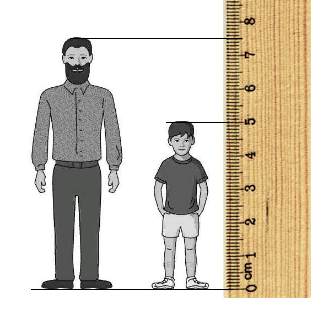

The table below gives the heights of fathers and their sons, based on a famous experiment by Karl Pearson around 1903. The number of cases is 1078. Random noise was added to the original data, to produce heights to the nearest 0.1 inch.

В таблице ниже приведены данные о росте отцов и их сыновей, основанные на известном эксперименте Карла Пирсона около 1903 года. Число случаев составляет 1078. К исходным данным был добавлен случайный шум, чтобы получить рост с точностью до 0,1 дюйма.

## Загрузка данных

In [ ]:
# Загрузим данные
data = pd.read_csv('/content/drive/MyDrive/Регрессия база/Fathers and Son/Pearson.txt', sep='\t')

In [ ]:
# Посмотрим на таблицы и ее размер
data

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


Таблица имеет два столбца **рост отца** и **рост сына** и 1078 строк.


In [ ]:
# Так как данные представленны в дюймах, то для привычного понимания переведем в сантиметры.
data['Father'] = round(data['Father'] * 2.54, 2)
data['Son']    = round(data['Son']    * 2.54, 2)

In [ ]:
# Посмотрим на результат
data.head()

,Father,Son
0,165.10,151.89
1,160.78,160.53
2,165.10,160.78
3,167.13,159.51
4,155.19,163.32


In [ ]:
data.describe()

,Father,Son
count,1078.000000,1078.000000
mean,171.924545,174.458033
std,6.974489,7.153206
min,149.860000,148.590000
25%,167.130000,169.930000
50%,172.210000,174.240000
75%,176.780000,179.070000
max,191.520000,199.140000


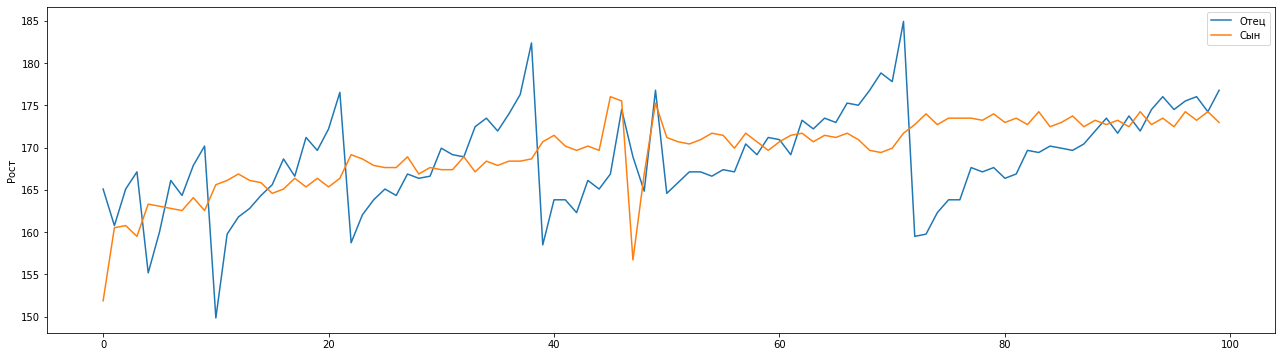

In [ ]:
# Посмотрим график
plt.figure(figsize=(22,6))
plt.plot(data['Father'][0:100], label='Отец')
plt.plot(data['Son'][0:100], label='Сын')
plt.ylabel('Рост')
plt.legend()
plt.show()

Как видно из графика бывает что при большом росте **Отца** рост **Сына** маленький и наоборот. Посотрим справится ли нейронная сеть с этой задачей. 

In [ ]:
# Интересно узнать корреляцию между графиками.

In [ ]:
correlate(data['Father'], data['Son'])
# Как видно данные плохо коррелириуются. Значение 0.5

0.5006814744100708

## Подготовка данных

In [ ]:
# Разделим на обучающую и тестовую выборки
xTrain, xTest, yTrain, yTest = train_test_split(data['Father'], data['Son'], test_size=0.139, shuffle=True) 

In [ ]:
xTrain    # Обучающая выборка

606    183.90
473    161.80
450    172.72
78     167.13
207    186.44
        ...  
350    164.85
368    180.34
250    173.48
709    172.97
818    178.31
Name: Father, Length: 928, dtype: float64

In [ ]:
yTrain   # Правильные ответы на обучающей выборке

606    180.09
473    170.94
450    165.35
78     173.23
207    191.26
        ...  
350    177.55
368    177.29
250    168.15
709    169.93
818    180.09
Name: Son, Length: 928, dtype: float64

In [ ]:
xTest

457    164.08
219    172.72
323    164.59
749    183.64
737    171.96
        ...  
755    165.61
831    178.31
669    160.78
30     169.93
716    177.04
Name: Father, Length: 150, dtype: float64

In [ ]:
yTest

457    167.89
219    159.77
323    175.01
749    172.72
737    172.97
        ...  
755    176.02
831    184.15
669    168.15
30     167.39
716    170.43
Name: Son, Length: 150, dtype: float64

In [ ]:
# Узнаем размер выборок
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

## Нормирование данных

In [ ]:
xTrain, xTest = np.array(xTrain), np.array(xTest)
yTrain, yTest = np.array(yTrain), np.array(yTest)

In [ ]:
# Делаем reshape, так как для обучающих и тестовых значений представлен только одлин столбец
xTrain, xTest =  np.reshape(xTrain, (-1,1)), np.reshape(xTest, (-1,1))
yTrain, yTest =  np.reshape(yTrain, (-1,1)), np.reshape(yTest, (-1,1))

In [ ]:
# Снова посмотрим на размер выборок
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(928, 1)
(928, 1)
(150, 1)
(150, 1)


In [ ]:
# Нормализуем обучающие данные
xScaler = StandardScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

In [ ]:
xTrain[:5]

array([[ 1.69837108],
       [-1.46023148],
       [ 0.10048979],
       [-0.69845086],
       [ 2.06139599]])

In [ ]:
# Аналогично проверочные
yScaler = StandardScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest =  yScaler.transform(yTest)

In [ ]:
yTrain[:5]

array([[ 0.76070119],
       [-0.5157579 ],
       [-1.29558373],
       [-0.19629437],
       [ 2.31895781]])

In [ ]:
# Посмотрим минимальные и максимальные значения
print(min(xTrain), max(xTrain))
print(min(xTest),  max(xTest))
print(min(yTrain), max(yTrain))
print(min(yTest),  max(yTest))

[-2.98522194] [2.78744581]
[-3.1667344] [2.64166416]
[-3.63366618] [3.41824717]
[-2.74781752] [2.46125161]


## Нейронная сеть

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(xTrain.shape[1],)))
model.add(Dense(150, activation='relu'))
#model.add(Dense(1000, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])

### Вывод summary и схемы нейронной сети

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_33 (Batc (None, 1)                 4         
_________________________________________________________________
dense_135 (Dense)            (None, 150)               300       
_________________________________________________________________
dropout_31 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 100)               15100     
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 101       
Total params: 15,505
Trainable params: 15,503
Non-trainable params: 2
_________________________________________________________________





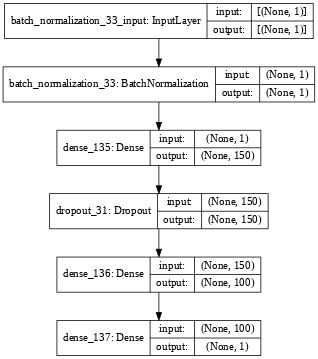

In [ ]:
showModel(model)

### Обучение (lr=1e-4) и график

Epoch 1/20
93/93 [==============================] - 1s 3ms/step - loss: 0.9659 - mae: 0.7581 - val_loss: 0.8350 - val_mae: 0.7052
Epoch 2/20
93/93 [==============================] - 0s 2ms/step - loss: 0.8344 - mae: 0.7069 - val_loss: 0.7897 - val_mae: 0.6773
Epoch 3/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7933 - mae: 0.6916 - val_loss: 0.7885 - val_mae: 0.6790
Epoch 4/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7761 - mae: 0.6912 - val_loss: 0.7988 - val_mae: 0.6837
Epoch 5/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7824 - mae: 0.6917 - val_loss: 0.8014 - val_mae: 0.6849
Epoch 6/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7810 - mae: 0.6888 - val_loss: 0.8011 - val_mae: 0.6850
Epoch 7/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7597 - mae: 0.6807 - val_loss: 0.8031 - val_mae: 0.6860
Epoch 8/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7802 - mae: 0.69

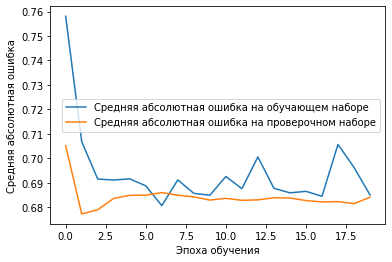

In [ ]:
history = model.fit(xTrain, yTrain, epochs=20, batch_size=10, validation_data=(xTest, yTest), verbose=1)
chart(model)

### Меняем шаг обучения lr=1e-5

Epoch 1/20
93/93 [==============================] - 1s 7ms/step - loss: 0.7835 - mae: 0.6870 - val_loss: 0.8002 - val_mae: 0.6840
Epoch 2/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7820 - mae: 0.6947 - val_loss: 0.8008 - val_mae: 0.6842
Epoch 3/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7874 - mae: 0.6932 - val_loss: 0.8009 - val_mae: 0.6845
Epoch 4/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7789 - mae: 0.6840 - val_loss: 0.8004 - val_mae: 0.6840
Epoch 5/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7665 - mae: 0.6834 - val_loss: 0.7997 - val_mae: 0.6837
Epoch 6/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7787 - mae: 0.6914 - val_loss: 0.7999 - val_mae: 0.6839
Epoch 7/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7771 - mae: 0.6889 - val_loss: 0.7995 - val_mae: 0.6839
Epoch 8/20
93/93 [==============================] - 0s 2ms/step - loss: 0.7885 - mae: 0.69

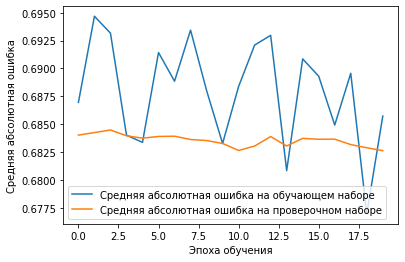

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])
history = model.fit(xTrain, yTrain, epochs=20, batch_size=10, validation_data=(xTest,yTest), verbose=1)
chart(model)

## Проверка результатов

In [ ]:
# Проверим результаты
pred = model.predict(xTest)      # Получаем выход сети на проверочной выборке
predUnscaled = yScaler.inverse_transform(pred)  # Делаем обратное преобразование
yTestUnscaled = yScaler.inverse_transform(yTest) # Делаем такое же обратное нормирование yTrain 
absDelta = abs(predUnscaled - yTestUnscaled)
modError = sum(absDelta) / len(absDelta)

In [ ]:
for i in range(20):
  print('Реальное значение - ',yTestUnscaled[i][0], "\tПредсказанное значение - ", round(predUnscaled[i][0], 2), "\tРазница - ", round(abs(yTestUnscaled[i]-predUnscaled[i])[0], 2))

Реальное значение -  167.89 	Предсказанное значение -  170.32 	Разница -  2.43
Реальное значение -  159.77 	Предсказанное значение -  175.3 	Разница -  15.53
Реальное значение -  175.01 	Предсказанное значение -  170.57 	Разница -  4.44
Реальное значение -  172.72 	Предсказанное значение -  180.35 	Разница -  7.63
Реальное значение -  172.97 	Предсказанное значение -  174.55 	Разница -  1.58
Реальное значение -  165.61 	Предсказанное значение -  168.34 	Разница -  2.73
Реальное значение -  182.88 	Предсказанное значение -  174.85 	Разница -  8.03
Реальное значение -  172.97 	Предсказанное значение -  170.94 	Разница -  2.03
Реальное значение -  168.4 	Предсказанное значение -  178.95 	Разница -  10.55
Реальное значение -  170.69 	Предсказанное значение -  173.71 	Разница -  3.02
Реальное значение -  176.28 	Предсказанное значение -  177.91 	Разница -  1.63
Реальное значение -  168.66 	Предсказанное значение -  174.25 	Разница -  5.59
Реальное значение -  154.94 	Предсказанное значение 

In [ ]:
print("Модуль ошибки в росте равен: ", round(modError[0], 4), "см")

Модуль ошибки в росте равен:  4.8932 см


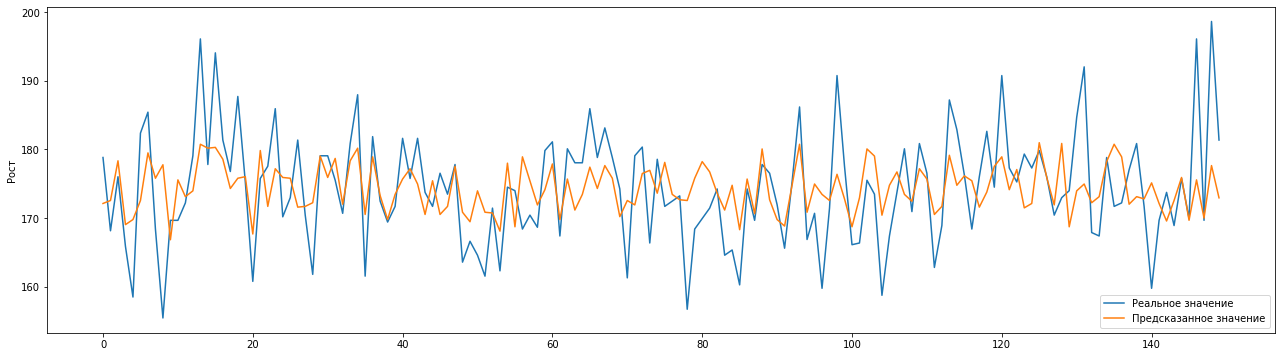

In [ ]:
# Посмотрим график
plt.figure(figsize=(22,6))
plt.plot(yTestUnscaled, label='Реальное значение')
plt.plot(predUnscaled, label='Предсказанное значение')
plt.ylabel('Рост')
plt.legend()
plt.show()

In [ ]:
correlate(yTestUnscaled, predUnscaled)

0.41482560453195927

## Выводы:

1. Сеть небольшая состоит из 15,505 нейронов
2. Обучение было с разными шагами (lr=1e-4 и lr=1e-5)
3. Выборка довольна маленькая:
 - Обычающая: 928
 - Тестовая:  150
4. Модуль ошибки в росте равен: 4.9243 см
5. Корреляция между графиками(реальным и предсказанным) - 0.41
6. При увеличение нейронов до 229,461 и изменении в большую сторону гиперпараметров улучшения предсказания не наблюдалось.
7. Нейронная сеть обучается очень быстро, можно проводить много экспериментов.

_______________________________________

# **Bollywood Movies Revenue(2015-2019)**
Revenue Prediction for Bollywood Movies

**Доход от фильмов Болливуда (2015-2019)**

Прогноз доходов от фильмов Болливуда

Данный датасет взят с сайта kaggle.com

https://www.kaggle.com/sahilsingh2402/bollywood-movies-revenue20152019

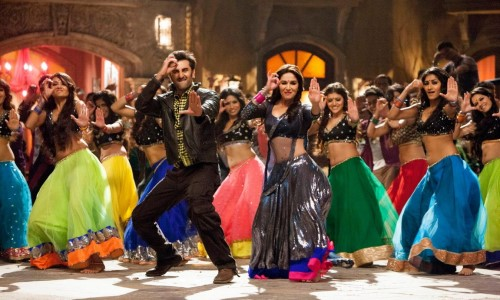

This dataset consists the list revenues earned by the movies along with the total budget of the films.

Этот набор данных содержит список доходов, полученных фильмами, а также общий бюджет фильмов.



## Загрузка данных

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Регрессия база/Bollywood Movies Revenue(2015-2019)/movies_revenue.csv')

In [ ]:
data

,box_office_collection,total_budget
0,979400000,500000000
1,955000000,750000000
2,948700000,1000000000
3,934500000,1000000000
4,933700000,1000000000
...,...,...
266,20000000,160000000
267,5300000,300000000
268,3000000,150000000
269,2402200000,800000000


In [ ]:
# Раз это Индия вероятно цены представлены в рупиях. Для привычного понимания переконвертируем в миллионы рублей. 
data['box_office_collection'] = (data['box_office_collection'] * 0.99) / 1_000_000 # При расчете курса валют 1 рупия = 0,99 рубля
data['total_budget']  = (data['total_budget']  * 0.99) / 1_000_000

Total revenue the film made on the **box office** - **Общая выручка** фильма по кассовым сборам.

**Total budget** used in film making  - **Общий бюджет**, использованный при создании фильма.

In [ ]:
# Раз цифры уже  в миллионах, переименуем заголовки
data.columns = ['Выручка(млн.руб)', 'Бюджет(млн.руб)']

In [ ]:
# Посмотрим результат 
data

,Выручка(млн.руб),Бюджет(млн.руб)
0,969.606,495.0
1,945.450,742.5
2,939.213,990.0
3,925.155,990.0
4,924.363,990.0
...,...,...
266,19.800,158.4
267,5.247,297.0
268,2.970,148.5
269,2378.178,792.0


In [ ]:
# Посмотрим на данные
data.describe()

,Выручка(млн.руб),Бюджет(млн.руб)
count,271.000000,271.000000
mean,636.325970,1106.374317
std,770.280508,2891.165706
min,2.970000,49.500000
25%,113.355000,232.650000
50%,338.778000,346.500000
75%,835.708500,693.000000
max,4950.000000,24750.000000


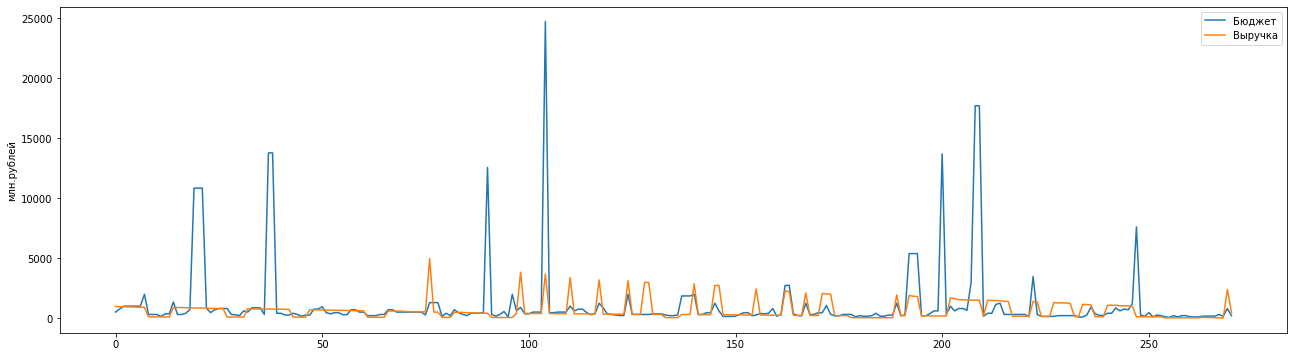

In [ ]:
# Выведем график
plt.figure(figsize=(22,6))
plt.plot(data['Бюджет(млн.руб)'], label='Бюджет')
plt.plot(data['Выручка(млн.руб)'], label='Выручка')
plt.ylabel('млн.рублей')
plt.legend()
plt.show()


 - Как видно из графика не всегда большой бюджет предполагает большую вырочку. По пикам Бюджета видно, что Выручка на порядок меньше.

 - Посмотрим как справится с этой задачей нейрононная сеть

## Подготовка данных

In [ ]:
# Разделим на обучающую и тестовую выборки
xTrain, xTest, yTrain, yTest = train_test_split(data['Бюджет(млн.руб)'], data['Выручка(млн.руб)'], test_size=0.145, shuffle=True)

In [ ]:
xTrain

81      198.0
13      346.5
207    2970.0
214    1237.5
50      940.5
        ...  
87      396.0
103     495.0
102     495.0
191     247.5
131     346.5
Name: Бюджет(млн.руб), Length: 231, dtype: float64

In [ ]:
yTrain


81       49.500
13       89.100
207    1496.781
214    1445.895
50      674.883
         ...   
87      415.800
103     376.200
102     377.190
191     190.674
131     300.168
Name: Выручка(млн.руб), Length: 231, dtype: float64

In [ ]:
xTest[:5]

184     396.0
267     297.0
163    2722.5
8       297.0
161     277.2
Name: Бюджет(млн.руб), dtype: float64

In [ ]:
yTest[:5]

184      23.364
267       5.247
163    2201.067
8        95.337
161     228.690
Name: Выручка(млн.руб), dtype: float64

In [ ]:
# Узнаем размер выборок
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(231,)
(231,)
(40,)
(40,)


## Нормирование данных

In [ ]:
# Переведем в numpy массив
xTrain, yTrain = np.array(xTrain), np.array(yTrain)
xTest, yTest = np.array(xTest), np.array(yTest)

In [ ]:
# Делаем reshape, так как для обучающих и тестовых значений представлен только одлин столбец
xTrain, yTrain = np.reshape(xTrain, (-1,1)), np.reshape(yTrain, (-1,1))
xTest, yTest   = np.reshape(xTest, (-1,1)), np.reshape(yTest ,(-1,1))

In [ ]:
# Снова посмотрим на размер выборок
print(xTrain.shape)
print(yTrain.shape)
print(xTest.shape)
print(yTest.shape)

(231, 1)
(231, 1)
(40, 1)
(40, 1)


## Нормализация значений

In [ ]:
# Нормализуем обучающие данные
xScaler = StandardScaler()
xScaler.fit(xTrain)
xTrain = xScaler.transform(xTrain)
xTest = xScaler.transform(xTest)

In [ ]:
# Аналогично проверочные
yScaler = StandardScaler()
yScaler.fit(yTrain)
yTrain = yScaler.transform(yTrain)
yTest =  yScaler.transform(yTest)

In [ ]:
# Посмотрим минимальные и максимальные значения
print(min(xTrain), max(xTrain))
print(min(xTest),  max(xTest))
print(min(yTrain), max(yTrain))
print(min(yTest),  max(yTest))

[-0.38793896] [6.16923848]
[-0.37507455] [8.78255303]
[-0.80527326] [6.00245426]
[-0.7949193] [4.24309878]


## Нейронная сеть

In [ ]:
# model = Sequential()
# model.add(BatchNormalization(input_shape=(xTrain.shape[1],)))
# model.add(Dense(200, activation='relu'))
# model.add(Dense(150, activation='tanh'))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation='linear'))

# model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

In [ ]:
model = Sequential()
model.add(BatchNormalization(input_shape=(xTrain.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(1000, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

### Вывод summary и схемы нейронной сети

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_40 (Batc (None, 1)                 4         
_________________________________________________________________
dense_158 (Dense)            (None, 128)               256       
_________________________________________________________________
dense_159 (Dense)            (None, 1000)              129000    
_________________________________________________________________
dropout_34 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_160 (Dense)            (None, 100)               100100    
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 101       
Total params: 229,461
Trainable params: 229,459
Non-trainable params: 2
_______________________________________________

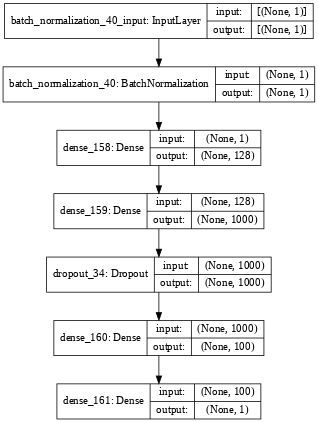

In [ ]:
showModel(model)

**Бостонские цены на жилье**

Данный датасет взят с сайта kaggle.com

https://www.kaggle.com/fedesoriano/the-boston-houseprice-data

**Содержание:**

1. Задание
2. Импорт библиотек и дополнительные функции
3. Оценка стоимости квартир
4. Оценка зарплаты на базе HeadHunter
5. Выводы

_____________________________________________________

### Обучение (lr=1e-4) и график

In [ ]:
history = model.fit(xTrain, yTrain, epochs=100, batch_size=20, validation_data=(xTest,yTest), verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 18ms/step - loss: 0.9935 - mae: 0.7048 - val_loss: 1.2191 - val_mae: 0.8130
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9765 - mae: 0.6958 - val_loss: 1.2148 - val_mae: 0.8090
Epoch 3/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9913 - mae: 0.6951 - val_loss: 1.2107 - val_mae: 0.8048
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9582 - mae: 0.6818 - val_loss: 1.2069 - val_mae: 0.8009
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9529 - mae: 0.6825 - val_loss: 1.2036 - val_mae: 0.7977
Epoch 6/100
12/12 [==============================] - 0s 7ms/step - loss: 0.9431 - mae: 0.6756 - val_loss: 1.2005 - val_mae: 0.7942
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9260 - mae: 0.6654 - val_loss: 1.1973 - val_mae: 0.7908
Epoch 8/100
12/12 [==============================] - 0s 8ms/step - loss: 0.9219 - 

## Проверка результатов

In [ ]:
# Проверим результаты
pred = model.predict(xTest)      # Получаем выход сети на проверочной выборке
predUnscaled = yScaler.inverse_transform(pred)  # Делаем обратное преобразование
yTestUnscaled = yScaler.inverse_transform(yTest) # Делаем такое же обратное нормирование yTrain 
absDelta = abs(predUnscaled - yTestUnscaled)
modError = sum(absDelta) / len(absDelta)

In [ ]:
for i in range(40):
  print('Реальное значение - ',round(yTestUnscaled[i][0], 2), "\tПредсказанное значение - ", round(predUnscaled[i][0], 2), "\tРазница - ", round(abs(yTestUnscaled[i]-predUnscaled[i])[0], 2))

Реальное значение -  23.36 	Предсказанное значение -  525.19 	Разница -  501.82
Реальное значение -  5.25 	Предсказанное значение -  503.07 	Разница -  497.83
Реальное значение -  2201.07 	Предсказанное значение -  822.45 	Разница -  1378.62
Реальное значение -  95.34 	Предсказанное значение -  503.07 	Разница -  407.74
Реальное значение -  228.69 	Предсказанное значение -  498.65 	Разница -  269.96
Реальное значение -  643.5 	Предсказанное значение -  536.29 	Разница -  107.21
Реальное значение -  198.0 	Предсказанное значение -  503.07 	Разница -  305.07
Реальное значение -  1092.56 	Предсказанное значение -  643.42 	Разница -  449.15
Реальное значение -  94.05 	Предсказанное значение -  465.59 	Разница -  371.54
Реальное значение -  184.24 	Предсказанное значение -  476.58 	Разница -  292.34
Реальное значение -  317.49 	Предсказанное значение -  483.18 	Разница -  165.69
Реальное значение -  990.5 	Предсказанное значение -  708.77 	Разница -  281.72
Реальное значение -  1021.58 	Пре

In [ ]:
print("Модуль ошибки в равен: ", round(modError[0], 4), "млн")

Модуль ошибки в равен:  544.5392 млн


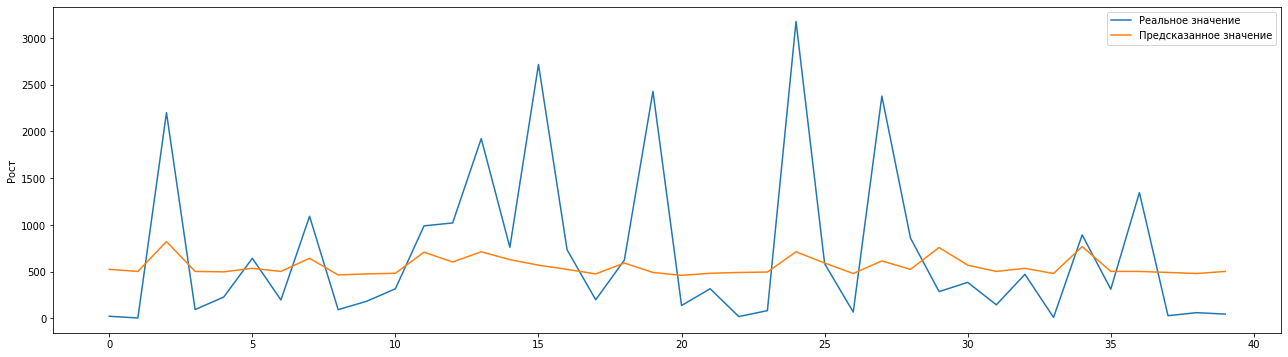

In [ ]:
# Посмотрим график
plt.figure(figsize=(22,6))
plt.plot(yTestUnscaled, label='Реальное значение')
plt.plot(predUnscaled, label='Предсказанное значение')
plt.ylabel('Рост')
plt.legend()
plt.show()

In [ ]:
correlate(yTestUnscaled, predUnscaled)

0.5615417526434997

## Выводы:

1. Сеть небольшая состоит из **229,461** нейронов
2. Выборка совсем маленькая:
 - Обычающая: **231**
 - Тестовая:  **40**
3. Модуль ошибки в росте равен: **544.5392** млн
4. Корреляция между графиками(реальным и предсказанным) - **0.56**
5. При уменьшении нейронов наблюдается незначительное ухудшение предсказани.
6. Нейронная сеть обучается очень быстро, можно проводить много экспериментов.
7. В связи с тем что нейронной сети трудно найти зависимость Бюджета от Выручки (очень не предсказуемое событие) и выборка очень маленькая, то результат далек от ожидаемого.